Homework 01. KNN

Task 01

In [1]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd


from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
plt.rcParams["figure.figsize"] = 12, 9
sns.set_style("whitegrid")

SEED = 111
random.seed(SEED)
np.random.seed(SEED)

In [84]:
X, y = fetch_openml(name="Fashion-MNIST", return_X_y=True, as_frame=False)

In [85]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
idx_to_stay = np.random.choice(np.arange(X.shape[0]), replace=False, size=1000)
X = X[idx_to_stay]
y = y[idx_to_stay]

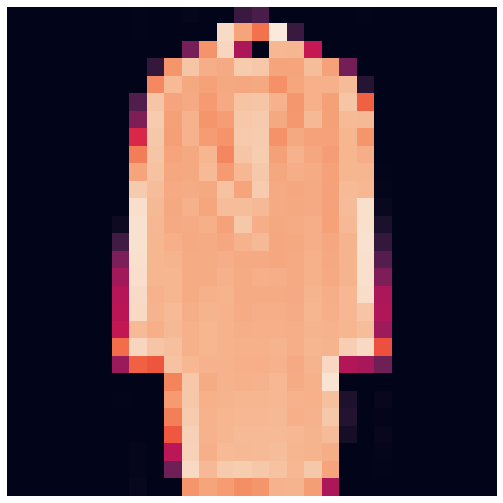

In [14]:
# возьмем случайную картинку и сделаем reshape
# 28, 28, 1 = H, W, C (число каналов, в данном случае 1)
image = X[np.random.choice(np.arange(X.shape[0]))].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

In [72]:
# Draw pictures from different classes
pictures_set = []
classes_list = set(y)

for i in classes_list:
    ind = np.where(y == i)
    pictures_set.append(X[ind[0][0]])
    
# сорри, список арреев - это костыльно, но быстренько освоить нумпай и матплотлиб я все равно не успею, 
# пусть хотя бы так будет

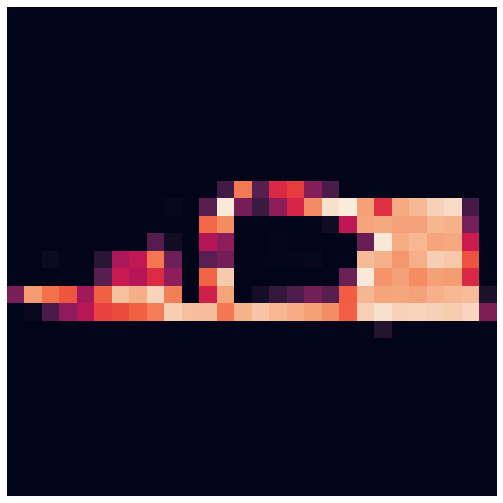

In [59]:
# class '0'
image = pictures_set[0].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

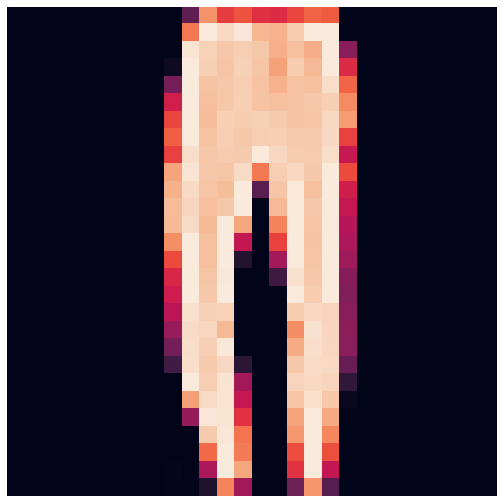

In [60]:
# class '1'
image = pictures_set[1].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

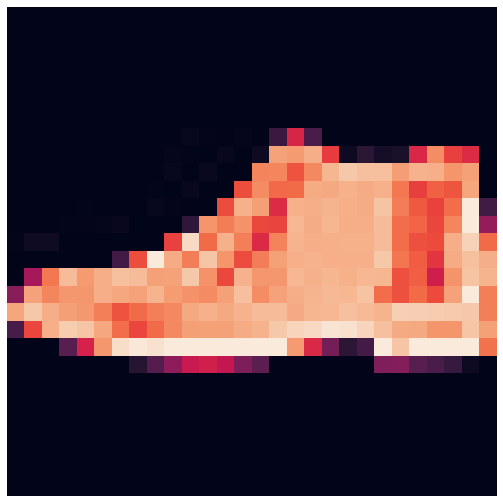

In [61]:
# class '2'
image = pictures_set[2].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

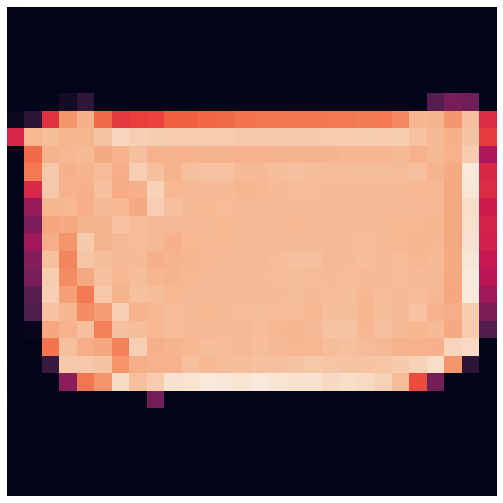

In [62]:
# class '3'
image = pictures_set[3].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

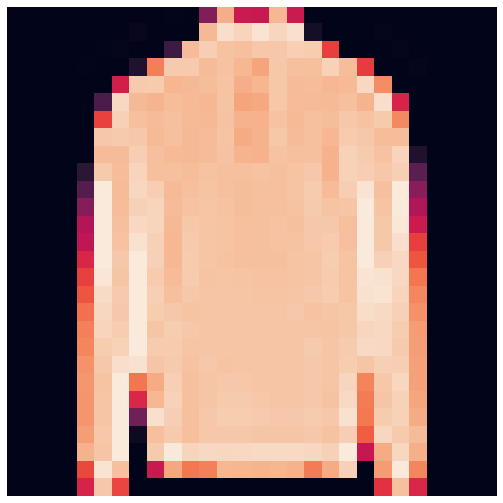

In [63]:
# class '4'
image = pictures_set[4].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

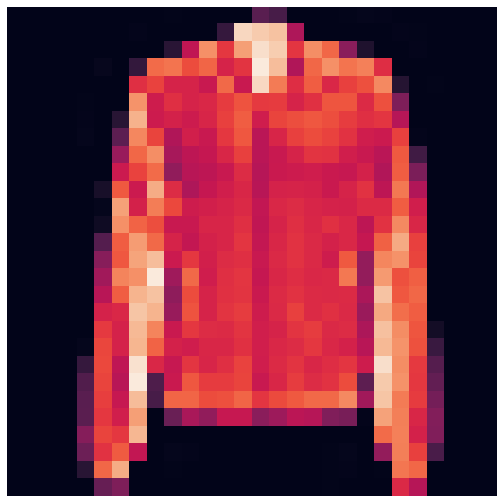

In [64]:
# class '5'
image = pictures_set[5].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

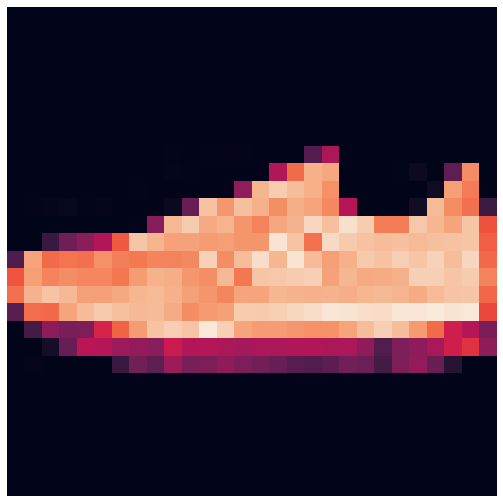

In [65]:
# class '6'
image = pictures_set[6].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

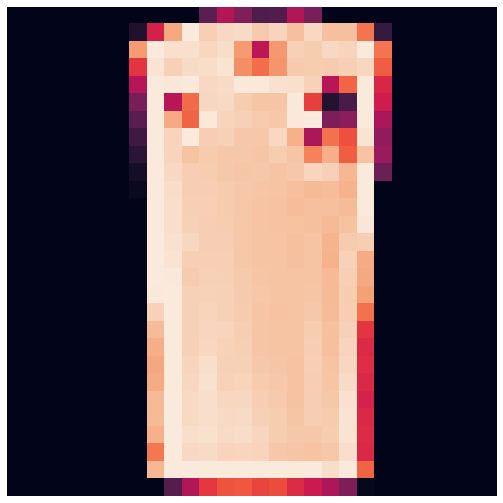

In [66]:
# class '7'
image = pictures_set[7].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

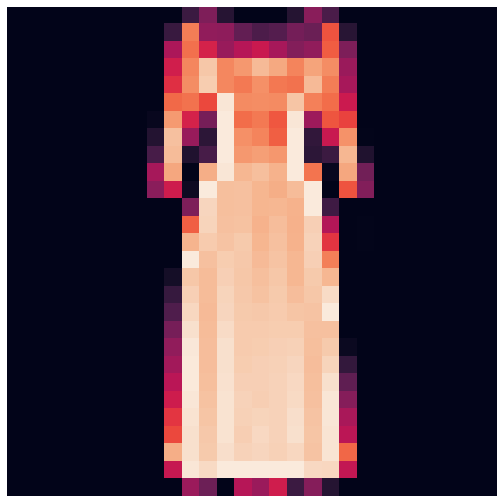

In [67]:
# class '8'
image = pictures_set[8].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

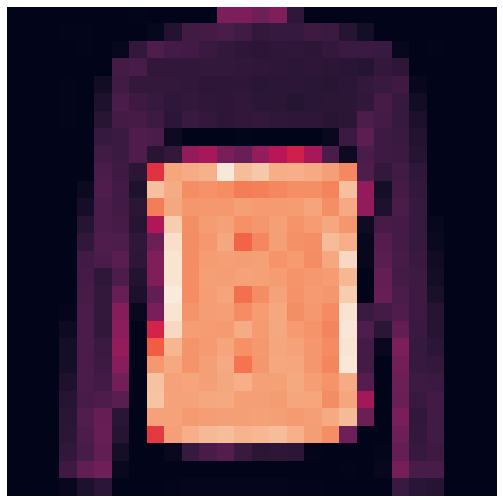

In [68]:
# class '9'
image = pictures_set[9].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

In [70]:
# EDA - class balance

class_balance = {}
for element in classes_list:
    for el in y:
        if el == element:
            if element not in class_balance.keys():
                class_balance[element] = 1
            else:
                class_balance[element] += 1
for key, value in class_balance.items():
    print(key, value)  

    
# кажется, что примерно равномерно объекты распределены по классам

5 98
1 102
9 106
8 109
2 95
4 96
7 79
0 93
3 121
6 101


In [90]:
# Страшное

# только объекты класса "0" и "1"
X_01 = X[(y == "0") + (y == "1")]
y_01 = y[(y == "0") + (y == "1")]

In [91]:
# Train and test splitting

X_train, X_test, y_train, y_test = train_test_split(X_01, y_01, test_size=0.33)

In [89]:
# KNN - не сделано

Task 02

In [93]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [94]:
X, y = load_diabetes(as_frame=True, return_X_y=True)

In [95]:
X.head() 
# age - age in years
# sex
# bmi - body mass index
# bp - average blood pressure
# s1 - tc, total serum cholesterol
# s2 - ldl, low-density lipoproteins
# s3 - hdl, high-density lipoproteins
# s4 - tch, total cholesterol / HDL
# s5 - ltg, possibly log of serum triglycerides level
# s6 - glu, blood sugar level 

# n = 442

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [96]:
y 
# y is a quantitative measure of disease progression one year after baseline

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [97]:
# EDA
# From the dataset description (https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset): 
# Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples 
# (i.e. the sum of squares of each column totals 1).
# Let's check the X and y means and standard deviations
X.mean()

age   -3.639623e-16
sex    1.309912e-16
bmi   -8.013951e-16
bp     1.289818e-16
s1    -9.042540e-17
s2     1.301121e-16
s3    -4.563971e-16
s4     3.863174e-16
s5    -3.848103e-16
s6    -3.398488e-16
dtype: float64

In [98]:
X.std()

age    0.047619
sex    0.047619
bmi    0.047619
bp     0.047619
s1     0.047619
s2     0.047619
s3     0.047619
s4     0.047619
s5     0.047619
s6     0.047619
dtype: float64

In [99]:
y.mean()

152.13348416289594

In [100]:
y.std()

77.09300453299109

In [ ]:
# X явно предобработан, т.к. у всех переменных одинаковые ст.отклонения, 
# поэтому ничего не буду делать (ну и еще потому что до дедлайна 2 часа)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [102]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

# pipe = Pipeline(steps=[("scaler", StandardScaler()), ("knr", KNeighborsRegressor())]) 
# пайплайн, если бы надо было стандартизовать данные, а потом сунуть их в регрессор
# но они вроде как уже предобработаны, поэтому я не буду его использовать

knr = KNeighborsRegressor()

In [103]:
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [104]:
knr.score(X_train, y_train) # проверим, что с точностью на трейн

0.592423367602132

In [106]:
knr.score(X_test, y_test) # на тесте

0.4235078003454733

In [107]:
y_pred = knr.predict(X_test) # y_test предсказание на основе X_test

In [108]:
y_pred

array([ 84.2, 150.4, 104.8, 161.4, 226.6, 219.6, 144.8, 105. , 279.2,
       170.8, 158.2, 261.8, 241.2, 136.8, 128. , 257.4, 132.8, 261.6,
       242.4,  82. , 135.8, 159.2, 200.2, 174.2, 112.6, 194.2, 245.2,
       187.4, 190. , 132.6, 161.6, 111.6, 109.2, 132.8, 262.8, 235.6,
       250.8, 129.6, 161.4, 169.6,  91.2, 186. , 110.4, 136. ,  72.2,
        86.6, 259.2, 111.2,  82.4, 179.2, 115.2,  99.4,  81. , 127.4,
       225.4, 107.4,  82. ,  93.6,  94.2, 228.2, 187. ,  98.8,  70.2,
       107.2, 257.2, 158. , 184.2, 175. , 138. , 197.6, 177.4,  70.8,
       124. , 106. , 137.4,  74. , 188. ,  78.2, 222. , 129.8, 118.4,
        75.2,  88.4, 140. , 213.4, 118. ,  74.6, 144.8,  75.6, 144.4,
       251.2, 117. , 108.4, 137.4, 154.6, 127. ,  72.6, 156. ,  64.6,
       127.2,  84.2,  93. ,  89.8, 221.6,  74. , 106. ,  56. , 213.4,
       116.6, 158.8, 226.8,  85. , 165. , 138.4, 172.6, 237.4,  74.6,
       244.4,  86.8,  92.4, 163.4, 130.4, 130. ,  72.8, 106. ,  96.4,
       119.4, 200. ,

In [110]:
y_test_as_array = np.array(y_test) # чтобы метрики не падали с ошибками

In [111]:
from metrics import r_squared, mse, mae

In [112]:
r_squared(y_pred, y_test_as_array)

0.42350780034547353

In [113]:
mse(y_pred, y_test_as_array)

3086.77095890411

In [114]:
mae(y_pred, y_test_as_array)

42.90410958904108

In [116]:
# Оптимальный k не найден, т.к. функцию find_best_k в 1 задании я не сделала

In [118]:
# социализации нет

In [ ]:
# фидбэк: все, что бы я здесь ни написала, будет расценено либо как хамство, либо как нытье, 
# поэтому я просто положу это на гитхаб и пойду спать. 